# Reinforcement learning --- Q-learning

In [1]:
# import lib

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
import time

In [2]:
# create 10x10 Q-table
SIZE = 10

In [3]:
NO_EPISODES = 25000
MOVE_PENALTY = -10                                           # reward for each step for police
ENEMY_CATCH_REWARD = 50                                      # reward for police to catch enemy

epsilon = 0.5                                                # randomness
EPS_DECAY = 0.9999                                           # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 1000                                            # how often to play through env visually.

start_q_table = None                                         # if we have a pickled Q table, we'll put the filename of it here.

LEARNING_RATE = 0.1
DISCOUNT = 0.95

POLICE = 1  # player key in dict
ENEMY = 2  # food key in dict


# create dic to choose colour
d = {
     1: (0, 255, 0),  # green
     2: (0, 0, 255)}  # red

In [4]:
class Env:
    def __init__(self):
        self.x = np.random.randint(0, SIZE)
        self.y = np.random.randint(0, SIZE)
        
    def __str__(self):
        return f"{self.x},{self.y}"
        
    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)
    
    def action(self, action):   # police is able to move at 2x speed only in diagonals..
        if action == 0:
            self.police_move(x=2, y=2)
        elif action == 1:
            self.police_move(x=-2, y=-2)
        elif action == 2:
            self.police_move(x=-2, y=2)
        elif action == 3:
            self.police_move(x=2, y=-2)
        return self.x, self.y
            
    def police_move(self, x=False, y=False):
        if not x:
            
            self.x += np.random.randint(-1, 2)
            
        else:
            self.x += x
            
        if not y:
            self.y += np.random.randint(-1, 2)
        else:
            self.y += y
            
        if self.x < 0:                             # we dont wont to go off screen!
            self.x = 0
        elif self.x > SIZE-1:
            self.x = SIZE-1
        if self.y < 0:
            self.y = 0
        elif self.y > SIZE-1:
            self.y = SIZE-1

        return self.x, self.y
    
    def enemy_move(self):
        self.x += np.random.randint(-1, 2)
        self.y += np.random.randint(-1, 2)
        
        if self.x < 0:
            self.x = 0
        elif self.x > SIZE-1:
            self.x = SIZE-1
        if self.y < 0:
            self.y = 0
        elif self.y > SIZE-1:
            self.y = SIZE-1
        return self.x, self.y

In [5]:
Police = Env()
Enemy = Env()

print(Police)                  # to check every thing is good till now!
print(Enemy)
print(Police-Enemy)
print(Police.police_move())
print(Enemy.enemy_move())
print(Police.action(2))

1,9
6,3
(-5, 6)
(1, 8)
(7, 2)
(0, 9)


Initialize q-table

create observation space and add it to Q-table

Our observation space include co-ordinates of Police and enemy

obs_space = (Police - Enemy) = choose random actions out of 4

In [6]:
Q_table = {}
for i in range(-SIZE+1, SIZE):
        for ii in range(-SIZE+1, SIZE):
            Q_table[((i, ii))] = [np.random.uniform(-5, 0) for i in range(4)]

In [7]:
# check
print(Q_table[((-9, -2))])

[-0.0547990286916491, -3.2891656987987288, -2.8759357227412794, -4.988701544996511]


In [8]:
episode_rewards = []

on #0, epsilon is 0.5
1000 ep mean: nan


C:\Users\hibat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hibat\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-1190
-520
-420
-1350
-990
-1750
-210
-1660
-2000
-770
-730
-170
-340
-250
-20
-2420
-1660
-160
-1200
-100
-1120
-950
-860
-3270
-10
-1180
-3810
-950
-230
40
-320
-710
-1830
-1290
-70
-1060
-10
-640
-140
-1150
-520
-1540
-580
10
-510
-190
-1860
-100
0
-470
-60
-780
-370
-450
-460
-270
-370
-1360
-1190
-180
-100
-420
-370
-280
-1320
-320
-4090
-420
-800
-630
-1940
-790
-330
-10
-390
-3590
-200
-940
-1650
10
-390
-780
-1450
-1490
-10
-610
-1600
-1290
50
-690
-680
10
-480
-1760
-550
-2030
-390
-80
-150
-980
10
-110
-1770
-240
-420
10
-2340
-280
-2740
-200
20
-690
-4330
-420
-300
-1030
-1160
-140
-20
-360
-710
-270
-210
-700
-330
-1410
-1050
-30
-1260
-120
-500
0
-1610
-1140
-110
-3390
-1040
-260
-1600
-140
-680
-1000
-400
-490
-620
-2080
-1210
-2020
-1470
20
-1700
-1270
-1990
-1380
-790
-1120
-1940
-640
-780
-770
-1440
-5070
-780
-580
-100
-1140
-1370
-490
-600
-440
-290
-1560
-110
-720
-2330
-1020
-420
-870
-1050
-1390
-640
-260
-750
-20
-1710
-600
-1590
-680
-1570
-670
-760
-590
-10
-73

-2400
-610
-620
50
-610
10
-90
-430
-1540
-2420
-510
-1060
-1760
-40
-3360
-50
-210
-470
-2540
-460
-110
-370
-510
-1640
50
-2550
-2530
-1980
-360
-1080
-1330
-200
-440
-500
-160
-530
-1020
-830
-390
-50
-670
-160
-3980
-2180
-2140
-170
-420
-10
-4810
-360
-130
-400
-1430
-410
-1030
-20
10
-1790
-20
-2460
-60
-1180
-760
-890
-560
-330
-20
-380
-150
-550
-60
-280
-450
-1580
-120
-240
-270
-600
-130
-220
-380
-610
-4730
-1150
-10
-460
-1380
-110
-540
-3560
40
-1480
-260
-4210
-1810
-670
-160
-5020
-520
-1560
-120
-390
-450
-1420
-480
-10
-2080
0
-840
-1200
-270
-40
-2820
-2180
-600
-40
-1160
-540
-220
-860
-1070
-330
-250
-600
-170
0
-90
-150
-630
-140
-260
40
-880
-2350
-160
50
-220
-590
-380
-1140
-50
-1110
-1290
-3740
-160
-1230
-1210
-1510
-340
-30
-710
-370
-20
-1630
-90
-840
-70
-150
-180
-670
-390
10
-230
-340
-680
-140
-190
-270
-500
-1300
-70
-940
-1350
-320
-1970
-160
-1330
-2500
-30
10
-110
0
-2170
-160
-580
-330
-30
-750
-1500
-2440
-110
-80
-2760
-390
-900
-1250
-1670
-390
-

-780
-380
-1330
-480
-650
-530
-570
30
-370
-2640
-180
-1820
-2070
-500
-480
-2090
-1010
-4410
-60
-2400
-2170
30
-450
-530
-670
-2210
-640
-850
-50
-1060
-900
-1510
-70
-760
-400
-1750
-1930
-1170
-1480
-1040
-250
-1700
-1490
-860
-310
-2250
-560
-1000
-1580
-1730
-90
-2200
-960
-1650
-380
-1390
-2390
-1490
-90
-900
-600
-1800
10
-900
50
-790
-390
-50
-230
-90
-1110
-370
-40
-1540
-620
-870
-350
50
-730
-2560
-510
-780
-630
-1110
-1660
-1850
-1610
-140
-250
-4380
-100
10
-720
-2070
-670
-270
-680
-1510
-1840
-190
-630
-380
-1430
-1880
-780
20
-60
-1300
-260
-2430
-2360
-2140
50
0
-330
-1160
-150
-1510
-150
-910
-230
-40
-150
-10
-140
-860
-1090
-1080
-1770
-120
-400
-500
-2060
20
-1630
-10
-1380
-120
0
-170
-1570
-3310
-670
-430
-3310
50
-830
-500
-710
-1150
-360
-660
-490
-1220
30
-1030
-230
-190
-550
-1010
-1260
-220
-10
-2470
-2460
-1360
-810
-220
-180
-610
-540
-540
-120
-1080
-1020
-440
-1250
-1260
-760
-2200
-680
-1010
-90
-330
40
-3430
-30
-430
-40
-10
-660
-740
-310
-650
20
-3

-760
-1640
40
-540
-160
-1440
20
-190
-210
-270
-220
-1690
-650
10
-780
-720
-1570
-40
on #5000, epsilon is 0.3032577478123883
1000 ep mean: -792.1
-700
-710
-400
-1360
-1780
-1000
-390
-990
-360
-2990
-1560
-110
-270
-1220
-1580
-610
-190
-300
0
-280
-1150
-80
-520
10
-430
-80
-170
-2680
-1860
-150
-2120
-170
-1010
-460
-400
-4910
-940
-710
-430
-3790
-640
-620
50
0
-300
20
-280
-120
-3180
-480
-450
-1120
-1130
-830
-830
-790
0
10
-110
-320
-1850
-2080
-800
-3100
-3020
-2120
-350
-2830
-1730
-360
-70
-1320
-220
-600
-1270
-680
-310
-770
-590
10
-5340
-1260
-650
-700
-1150
-870
-860
50
-40
-160
-300
-130
-50
-90
-20
-1520
-2800
-1830
-50
-50
-1590
-660
-760
-590
-3020
-200
-280
-1240
-1090
-240
-1860
-2640
-1550
-850
-2130
-190
-1310
-250
-520
-710
-1400
0
-410
-110
-360
-260
-1830
40
-980
-790
-6020
30
-2570
-370
-150
-80
-860
-240
-1790
-190
-440
-690
50
-1150
-870
-1820
-2440
-1230
-1400
-1520
-1020
-1090
-680
-1680
-120
-630
-170
0
-250
-1350
-500
0
-1480
50
-650
-1240
-270
-1380
-

-540
-2920
-1230
-400
-140
-850
-1990
-1530
-790
-230
-690
-690
-2110
-160
-660
-550
-1130
-2020
-1340
-410
-440
-710
-630
-1080
-100
-1300
-10
-1590
-600
-1780
-1600
-460
-300
20
-1340
-1280
-720
-510
-3920
-4490
-60
-120
-320
-670
-780
-310
-160
-30
-1250
-370
-810
-630
-3430
-60
-690
-310
-1050
-300
-370
-1200
-200
-2070
-1600
-1040
-100
-30
-540
-530
-480
-1040
-190
0
-1480
-1530
-340
-200
-180
-800
-530
-360
-1540
-1370
-2830
-1250
-930
-720
-260
40
-510
-1160
-300
-590
-120
-420
-640
20
-3600
-850
-770
-1280
-1060
-470
-590
-890
-740
-450
-400
-660
-700
-280
-460
-580
-520
-3270
-480
0
-630
-50
-1350
-40
-550
-1270
-1880
-630
-630
-310
-310
-50
-80
-130
-800
-140
-300
-1000
-840
-60
-500
-250
-330
-600
-100
-920
-420
40
-110
-910
-30
-450
-360
-350
-930
-50
-710
-970
-1910
-3590
-360
-1050
-490
-210
-250
-120
-1950
-3290
-2020
50
-540
-3020
-190
-1110
-920
-880
-1080
-640
-500
-1370
-820
-90
-670
-260
-570
-290
-1910
-1360
-1770
-180
-1370
-20
-3200
-560
-2010
-760
-310
-10
-1190

-1030
-690
-320
-590
-990
-10
-720
-640
-1420
-110
-60
-420
-910
-690
-550
-400
-980
-1040
-340
-2010
-1690
-880
-2700
-440
-170
-1690
-1360
-780
-2150
-370
-50
-2300
-950
-740
-1290
-140
-570
-200
-860
-690
-1550
-70
-450
-70
-1160
-640
40
-720
-90
10
-290
-380
40
-1500
-260
-1850
-2310
50
40
-300
-290
-1400
-2350
30
-580
-130
-930
-950
-780
-510
-440
-400
-230
-530
-220
-160
-100
-900
-540
-1340
-160
-560
-1260
-50
-60
-180
-370
-1650
-130
-1340
-870
-480
-1320
-240
-420
-1910
-1120
-770
0
-1210
-1880
-1040
-180
-1010
-270
-70
-1170
-160
-830
-60
-160
-50
-90
-950
-160
-1150
-560
-590
-330
-350
-1170
-210
-1930
-2030
-2060
-640
-1950
-10
-290
-310
-910
-860
-160
-1100
-930
-1460
-1640
-110
-170
-410
-1620
-1410
-400
-390
-390
-680
-40
-1430
-430
-3860
-680
-2390
-1380
-50
-160
-150
-670
-1510
-750
-170
-490
40
-1870
-730
-2470
-980
-630
-560
-2630
-220
0
-680
-350
-1180
-310
-10
-2830
-780
-380
-90
-190
-60
10
-750
-550
-1340
-60
-420
-2060
-860
-2010
-2950
-1260
-2520
-1030
-1000
-5

-570
-1310
-1150
30
-420
-110
-850
-70
-470
-100
-310
-1400
-980
-50
-640
-140
-1100
-320
-110
-880
-40
-740
-320
-120
-990
-140
-320
-790
-5990
-120
-750
-750
-1200
-3370
-200
-360
-630
-290
-1360
40
-260
-140
-800
-280
-80
-480
0
-3270
-420
-810
-190
-900
-280
-1710
-1410
-1080
-5620
-350
-1310
-1750
50
-560
-840
-160
-290
-160
-1300
-2060
-110
-340
10
-340
-2780
-600
-1330
-1620
-600
-1210
-300
-370
-1610
-210
on #10000, epsilon is 0.1839305232164846
1000 ep mean: -752.47
-160
20
40
-1670
-50
-760
-2020
30
-50
-400
40
-160
-760
-640
-450
-730
-1340
50
-510
-1730
-140
-1180
-2020
-710
-2560
-1520
-1330
-200
-40
-930
-660
-560
-670
-250
-470
-420
-620
-410
-1390
-630
-20
-1440
-10
50
-310
-430
-1530
-790
-2920
-270
-100
-1840
-70
-2370
-390
20
-320
-1420
-130
-580
10
-140
-420
-50
-750
-680
-420
-2230
-150
-2030
-650
-850
-130
-1870
-1000
-510
-1300
-920
-330
-30
-400
-860
-650
-1510
-720
-440
-930
-880
-1020
-610
-1230
-90
-990
-720
-1260
-810
-3370
40
-800
-180
-330
-400
20
-1410
-2

-800
-2350
-550
-60
-570
-1150
0
-220
-1000
-890
-2040
-100
-140
-840
-1920
40
-1360
-960
-430
-2160
-110
-1470
-1520
-1610
-810
-1620
-270
-1960
-60
10
-1080
-2360
50
-10
-700
-1360
-830
-220
-1210
-920
-200
-140
-2180
-540
-1050
-90
-1240
-930
-90
-130
-810
-450
-1650
-210
-250
-480
-170
-1200
-1930
10
-1980
-430
-690
-630
-370
-840
-90
-440
-560
-320
-280
-1750
-660
-700
-110
-920
20
-510
-70
30
-1740
-1850
-2600
-780
-910
-1460
-640
-1860
-530
-1530
-910
-840
-2900
-2010
-3570
-420
-320
-130
-540
-1130
10
-2060
-1170
-1140
-870
-2990
-140
-760
-470
-60
-410
-610
-480
-770
-330
-910
-1470
-890
-890
-1210
10
20
-1140
-420
-180
-120
-1460
-250
-150
-920
-110
-660
-280
-2030
-90
50
-1500
-110
30
-1700
-1630
-2060
-1080
-1130
-2620
-160
-70
-420
-490
-70
-370
-250
-740
10
-220
-580
-330
-80
-1320
-530
-200
-1050
-120
-210
-1660
-140
-2070
-100
-600
-1830
-160
-960
-340
-420
-1170
-1570
-360
-270
-2040
0
-2920
-2760
-300
-440
-970
-30
-220
-160
-660
-840
-400
-50
-1690
-710
-390
-210
-76

-350
-20
-1080
-150
-780
-340
-890
-20
-410
-410
-770
-50
-1270
-1130
-280
-720
-1460
-1020
-420
-2230
-1930
-170
-50
-950
-550
-5230
-410
-1550
-4480
-40
-680
-3370
50
-630
-700
-200
-80
-650
-30
-600
-180
-2370
-440
-160
-70
-2070
-490
-120
-440
0
-300
-1140
-610
-770
10
-120
-550
-900
-590
-500
-3090
-60
-370
-580
-630
-210
-2250
-1250
-130
-2840
-960
-1050
-650
-310
0
-1080
-1170
-180
-100
-360
-820
-1420
-30
-160
-240
-1690
-190
-2060
-190
-90
-2590
-230
-580
-780
-580
-380
-1260
-1700
-1380
-800
-120
-990
-110
-620
-1300
-970
-1360
-250
-250
-1360
-330
-770
-2590
-270
-600
-870
-10
-380
-3330
-1370
-50
-680
-220
-2120
-1550
-270
-700
-630
-910
-470
-50
-1950
-30
-1110
40
-530
-140
-210
-900
-2650
-20
-930
-1270
-720
-100
-100
-660
-590
-170
-730
-860
-400
-150
30
-250
-20
-270
-1340
-310
-3090
-540
-70
-150
-2080
-320
-790
-390
20
40
-1180
-480
-720
-2950
-800
-460
-280
-640
-800
-200
-200
-70
-300
-500
-460
-1600
-70
-510
-1380
-3430
-180
-2370
-650
-80
-530
-530
-1800
-880
-790

-1100
50
-1180
-450
-640
-160
-760
-1780
-750
-2710
-540
-510
-270
-250
-720
-180
-290
-1990
-410
50
30
-570
-540
0
-540
-270
-910
-1900
-170
-200
-610
-430
-950
-1020
-1480
-550
-1050
-910
-1970
-680
-20
-1040
-1260
-140
-940
-300
-210
-700
-4520
-870
-60
-470
-40
-30
-360
-1250
40
-800
-110
-140
-1840
-410
-470
-140
-160
-230
-780
-390
on #15000, epsilon is 0.1115567124491704
1000 ep mean: -742.31
-920
-1250
-180
-2110
-500
-1460
-180
-930
-2750
-440
-490
-1550
-70
0
-190
-770
-260
-540
-260
-190
-1370
-1480
-400
-2320
-350
-1760
50
-1420
-130
-2120
-560
-50
-740
-300
-1110
-100
-300
-60
-570
-670
20
20
-230
-80
-220
40
-2660
-2170
-670
-1390
-3010
-2160
-230
40
-1480
-320
20
-1650
-880
-150
-1930
-1890
-90
10
-730
-250
-740
-10
-500
-160
-90
-1470
-1340
-1000
40
-240
-1090
-1280
-700
-290
0
20
-360
-600
-3430
-270
-80
-260
0
-310
-200
-690
-430
-180
-930
-390
-40
-260
-600
-200
-250
-120
-450
-980
-210
-350
-80
-1960
-120
-180
-900
-960
-690
-1520
-310
-2050
-2540
-700
-2280
-240
-1

-570
-390
-510
-130
-1140
-130
-680
-220
-960
40
-340
-360
-200
-680
-560
-490
40
-100
-340
20
-150
-100
-450
-50
-590
-570
-340
-970
20
0
-260
-810
-990
-670
-340
-980
-600
-1830
-760
-320
-290
-690
-720
-2190
-990
-540
-1300
-70
-30
-130
-310
-340
-510
-70
-2270
-2110
-360
-110
-480
-270
-920
-270
-60
-280
-260
0
-230
30
-2730
-70
-440
40
-4110
-550
-170
-670
-70
20
-360
-3160
-580
-840
-270
-550
-470
-370
-340
-1200
-1630
-40
-40
-10
-1150
-310
-250
10
-180
-950
-710
-2510
-600
-350
40
-350
-400
-280
-630
30
-1020
-120
-180
-500
-3110
40
-470
-40
-310
-760
-710
-470
-910
-550
-990
-770
-2780
-1170
-420
-290
-410
-810
-190
10
-1130
-110
50
-200
-1670
-50
-2190
-570
-360
-2720
-3970
-2130
-760
-80
-140
-1190
-2280
-160
-550
-430
-60
-1400
-490
20
-1780
-460
-520
-40
-940
-660
-710
-350
-70
-530
-160
-520
40
-290
-600
-370
-540
-2470
-240
-130
-1740
-390
30
-2980
-170
-190
-360
0
-440
-1150
30
-1270
-1010
-20
-510
-510
50
-2820
-1180
30
-270
-1930
-810
30
-70
-350
-1010
-350
-1030
-180

-1300
50
-110
-20
-740
-750
-800
-400
-710
-1210
-930
-20
-540
40
-750
-740
-480
-160
-180
-2570
-2530
-80
-880
-1150
-3170
-150
-1500
-2810
-1470
-320
-830
-2770
-260
-1330
-1550
-10
-100
-200
-440
-70
-2190
-190
-180
-1690
-60
-340
-50
-1050
-990
-1550
-850
-1190
20
-450
-1340
-50
-460
-630
-330
-370
-1150
20
-50
-410
-530
-1420
-500
50
-1620
-1940
20
-780
50
-730
-690
-330
-120
-290
-140
-290
-470
-10
-380
0
-380
-200
-310
-760
-160
0
-390
-10
-220
-1390
-180
-860
-260
-90
-2030
-250
-120
-720
-1270
-40
-330
-160
-30
-1030
-1150
-150
-400
-730
-710
-1160
-1720
-410
-430
-1910
-760
-2050
-1740
-30
-150
-60
-1330
0
-1130
-110
-3580
-430
20
-2170
-970
-800
-930
-950
-1200
-260
-540
0
-150
-1080
-1060
-100
-230
-790
-380
-350
-1040
-3560
-110
-1740
-70
-710
-670
-490
-1350
-970
-1430
-230
40
-640
-2290
-950
-2020
-210
-370
-20
-510
-690
50
0
-1100
-590
-560
-280
-2210
-130
-620
-1970
-660
-650
-1870
-5630
10
-200
-350
-720
-260
-160
-80
-10
-880
-1100
-10
50
-190
-390
-850
10
-470
-240


-1850
-3170
-380
-40
-960
-110
-1070
-1230
-1270
-90
-10
-580
-20
-140
-90
-1380
-900
-1710
-760
-2270
-690
-1100
-440
-270
-380
-180
-330
-590
-3030
-580
-1310
-780
-820
-1050
-770
-100
30
-320
-370
-1250
-540
-210
-300
-460
-4290
-520
-440
50
-370
-550
0
-150
-820
-40
-1830
-1200
-180
-120
-330
-130
-40
-2960
-70
-650
-1690
-400
-130
-940
-150
-190
-370
-200
-740
-320
0
-310
-1290
-1360
-90
-120
-2200
-390
-1040
-450
-660
-600
-480
-1630
-260
-1030
-410
50
-4760
20
-330
-1020
-690
-250
-120
-1470
-180
-290
-2190
-520
-60
-450
-440
-100
-310
-1350
-630
-2770
-50
-650
-450
-180
-660
-1190
-320
-90
20
-220
-70
-500
-1220
-110
-1350
-550
-1740
-110
-740
-440
-870
-1200
-50
-180
-390
30
-110
-180
-420
-200
-200
-750
on #20000, epsilon is 0.06766087474137944
1000 ep mean: -720.68
-2050
-3460
-3010
-1160
-990
-1750
10
-800
-240
-420
-140
-940
-270
-370
-480
-910
-1490
-870
-1760
-2120
-600
-50
-2980
-920
-500
-370
-1190
-1200
-70
-2170
-2770
-240
-1150
-240
-2650
-10
-260
-2050
-1650
-540
-

-350
-240
-910
-220
-1910
-600
-630
-1740
-1420
-370
-60
-180
-2190
-360
-970
-800
-540
-680
-20
40
-1380
-2190
-520
-220
-820
-1710
-420
-430
-2260
-130
-750
-2770
-3450
10
-500
-960
-890
-40
-20
-920
-1070
-1040
30
-400
-2030
-30
-470
-3870
-1450
-1090
-760
-830
-40
-820
-10
-80
-120
-1530
-80
-20
-300
20
-250
-790
-410
-1220
-80
-1620
-560
-230
-1230
-1170
-40
-60
-430
-2290
-1620
-420
-460
-140
-1310
-1100
-480
-1520
-300
-710
-1160
-590
-310
-1040
-500
-2070
-450
-820
-1050
-10
-2490
30
-1120
-780
-580
-800
-120
-20
-730
-520
-1080
-970
-370
30
-490
-1440
-2220
-90
-1710
-1720
20
-500
-390
-90
-3000
-270
-340
40
-400
-330
-400
-1060
-430
-560
-710
-730
-610
-380
-2080
-260
-1140
-180
-1070
-490
-730
-400
-620
-380
-550
-1740
-270
-1210
-400
-1500
-120
-1510
-3360
-450
10
10
-490
-730
0
-590
-1800
-1640
-990
-410
-260
-790
-40
-860
-470
-1440
-540
-190
-1790
-880
-650
50
-100
-1430
-180
-1040
-730
-50
-1060
-900
-1300
-400
-410
-250
-1400
-110
-1190
-540
-2450
-600
-1280
-1750
-50


-1260
-270
-580
-1440
-240
-390
40
-190
-1060
50
-1350
-170
-1540
-80
-2150
-870
-260
-950
-240
-140
-1560
0
-800
-120
-1410
-370
50
-340
-60
-500
-860
-80
-200
-350
-2170
-520
-1500
-140
-410
-510
-90
-1740
-1510
-720
-2150
-450
-1440
-1890
-1370
-290
30
-2210
-70
-70
-120
-1180
-3880
-610
-100
-740
-960
-1560
-1270
-70
-1980
-570
-1450
-300
-1070
-410
-340
-50
-450
-10
-180
-270
-250
-890
-560
-1490
-970
-290
-250
-1320
-560
-10
-250
-2340
-290
-2080
-190
50
-190
-50
-1580
10
-1100
-1020
-130
-270
-1630
-1000
-210
-200
-380
-390
-50
-670
-890
-750
-510
-980
-120
-10
-700
-220
-3560
-770
-380
-1440
-200
-350
-1210
-1560
-1520
-980
-500
-630
-1220
-1230
40
-510
-1100
-40
-1560
-90
-380
-330
10
-2180
-190
-1090
-410
-590
-240
-260
-70
-440
-790
-110
-4180
-80
-760
-650
-1890
-420
-420
50
-630
-650
-270
-130
-110
-490
-1250
-400
40
-110
-270
30
-640
50
-70
-740
-540
-590
-750
-610
-210
-90
-100
-40
20
-1040
20
-1050
-250
-1160
30
-1310
-220
-640
-450
-70
-340
-10
-750
30
-270
20
-170
-11

-200
-330
-220
-2220
-50
-300
-1870
-70
-390
-420
-840
-150
-210
-940
-760
-140
-280
-1460
-340
-340
-1250
-540
-360
-1220
-50
-600
-60
-1580
-1500
-480
-860
-600
-80
-340
-600
-200
-50
-100
0
-500
30
-300
-1210
-290
-730
-2510
-110
-390
-1430
-1130
-500
-1010
-280
-360
-3360
-420
-170
50
40
-1510
-1200
-310
-300
-2080
-500
-270
-390
-220
-900
-30
-740
-2140
-90
-500
-3000
-660
0
-2190
-1000
-2480
-1310
-70
-140
-110
-1040
-440
-2620
-930
-540
-60
-1870
-1210
-2140
-800
-190
-1180
-580
-190
-490
-1000
-410
-4100
-3170
-250
-100
-380
-790
-1400
-650
-40
-380
-1240
-400
-830
-2070
-2970
-530
-1420
-2840
-1090
-1240
-2080
-1610
-1080
20
-790
-530
-230
-1130
-320
-220
-1040
-180
-40
-390
-670
-200
-2170
-310
40
-1390
-1030
-650
-970
-190
-110
-280
-3300
-180
-890
-160
-250
-580
-1170
-430
-640
40
-470
-50
-400
-550
-40
-780
-840
-540
-1690
-1020
-120
-130
-610
-140
-1210
-30
-3600
50
-650
-50
-160
-150
-860
-450
-530
-260
0
-580
-490
-280
-1700
-890
-260
40
-1720
-1010
-460
-810
-190
-470


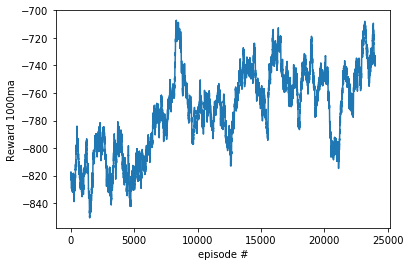

In [9]:
for episode in range(NO_EPISODES):
    Police = Env()
    Enemy = Env()
    
    if episode % SHOW_EVERY == 0:
        print(f"on #{episode}, epsilon is {epsilon}")
        print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")
        show = True
    else:
        show = False
        
    episode_reward = 0
    for i in range(2000):
        obs = (Police-Enemy)
        #print(obs)
        if np.random.random() > epsilon:
            # GET THE ACTION
            action = np.argmax(Q_table[obs])
            #print(action)
        else:
            action = np.random.randint(0, 4)
            #print(action)
        # Take the action!
        Police.action(action)
        Enemy.enemy_move()
        
        if Police.x == Enemy.x and Police.y == Enemy.y:
            reward = ENEMY_CATCH_REWARD
        else:
            reward = MOVE_PENALTY
            
        new_obs = (Police-Enemy)
        #print('new_obs:', new_obs)
        max_future_q = np.max(Q_table[new_obs])
        #print(' max_future_q:',  max_future_q)
        current_q = Q_table[obs][action]
        
        if show:
            env = np.zeros((SIZE, SIZE, 3), dtype=np.uint8)  # starts an rbg of our size
            env[Police.x][Police.y] = d[POLICE]  # sets the police location tile to green color
            env[Enemy.x][Enemy.y] = d[ENEMY]  # sets the enemy tile to blue
              # sets the enemy location to red
            img = Image.fromarray(env, 'RGB')  
            img = img.resize((300, 300))  # resizing so we can see our agent in all its glory.
            cv2.imshow("image", np.array(img))  # show it!
            if reward == ENEMY_CATCH_REWARD:
                #cv2.VideoCapture('training.mp4')
                if cv2.waitKey(500) & 0xFF == ord('q'):
                    break
            else:
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

        episode_reward += reward
        if reward == ENEMY_CATCH_REWARD or reward == -400:
            break
            
    print(episode_reward)
    episode_rewards.append(episode_reward)
    epsilon *= EPS_DECAY

moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,))/SHOW_EVERY, mode='valid')

plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f"Reward {SHOW_EVERY}ma")
plt.xlabel("episode #")
plt.show()

with open(f"qtable-{int(time.time())}.pickle", "wb") as f:
    pickle.dump(Q_table, f)   